In [1]:
# data source = engine data 


# !pip install pandas numpy matplotlib seaborn scikit-learn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import datetime
import time
import random




In [2]:
df = pd.read_csv('engine_data.csv')


###  Info about data 
- Enigine rpm 
- lubricant oil temperature
- coolant temperature
- coolant pressure
- lubricant oil pressure
- fuel pressure
- engine condition 1/0

In [3]:
df.describe().round(3)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000,19535.000,19535.000,19535.000,19535.000,19535.000,19535.000
mean,791.239,3.304,6.656,2.335,77.643,78.427,0.631
std,267.611,1.022,2.761,1.036,3.111,6.207,0.483
min,61.000,0.003,0.003,0.002,71.322,61.673,0.000
25%,593.000,2.519,4.917,1.600,75.726,73.895,0.000
50%,746.000,3.162,6.202,2.167,76.817,78.347,1.000
75%,934.000,4.055,7.745,2.849,78.072,82.915,1.000
max,2239.000,7.266,21.138,7.479,89.581,195.528,1.000


In [4]:
df.isna().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [6]:
df['Engine Condition'].value_counts()
# "0" Engine in a normal or healthy condition
# "1" Engine in a faulty or problematic condition

Engine Condition
1    12317
0     7218
Name: count, dtype: int64

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('engine_data.csv')
features = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 
           'Coolant pressure', 'lub oil temp', 'Coolant temp']

In [8]:
print("Statistical Summary by Engine Condition:")
summary = df.groupby('Engine Condition')[features].describe()
display(summary)

Statistical Summary by Engine Condition:


Engine rpm                                               \
                      count        mean         std    min    25%    50%   
Engine Condition                                                           
0                    7218.0  884.995012  271.722814  351.0  685.0  843.0   
1                   12317.0  736.296582  249.302159   61.0  552.0  690.0   

                                 Lub oil pressure            ... lub oil temp  \
                     75%     max            count      mean  ...          75%   
Engine Condition                                             ...                
0                 1031.0  2239.0           7218.0  3.222497  ...    78.370924   
1                  868.0  2172.0          12317.0  3.351406  ...    77.890560   

                            Coolant temp                                  \
                        max        count       mean       std        min   
Engine Condition                                                           
0                 89.580796       7218.0  78.803030  5.968385  62.445955   
1                 89.286302      12317.0  78.207326  6.332167  61.673325   

                                                               
                        25%        50%        75%         max  
Engine Condition                                               
0                 74.417149  78.768801  83.169343  118.371957  
1                 73.568756  78.100543  82.768355  195.527912  

[2 rows x 48 columns]

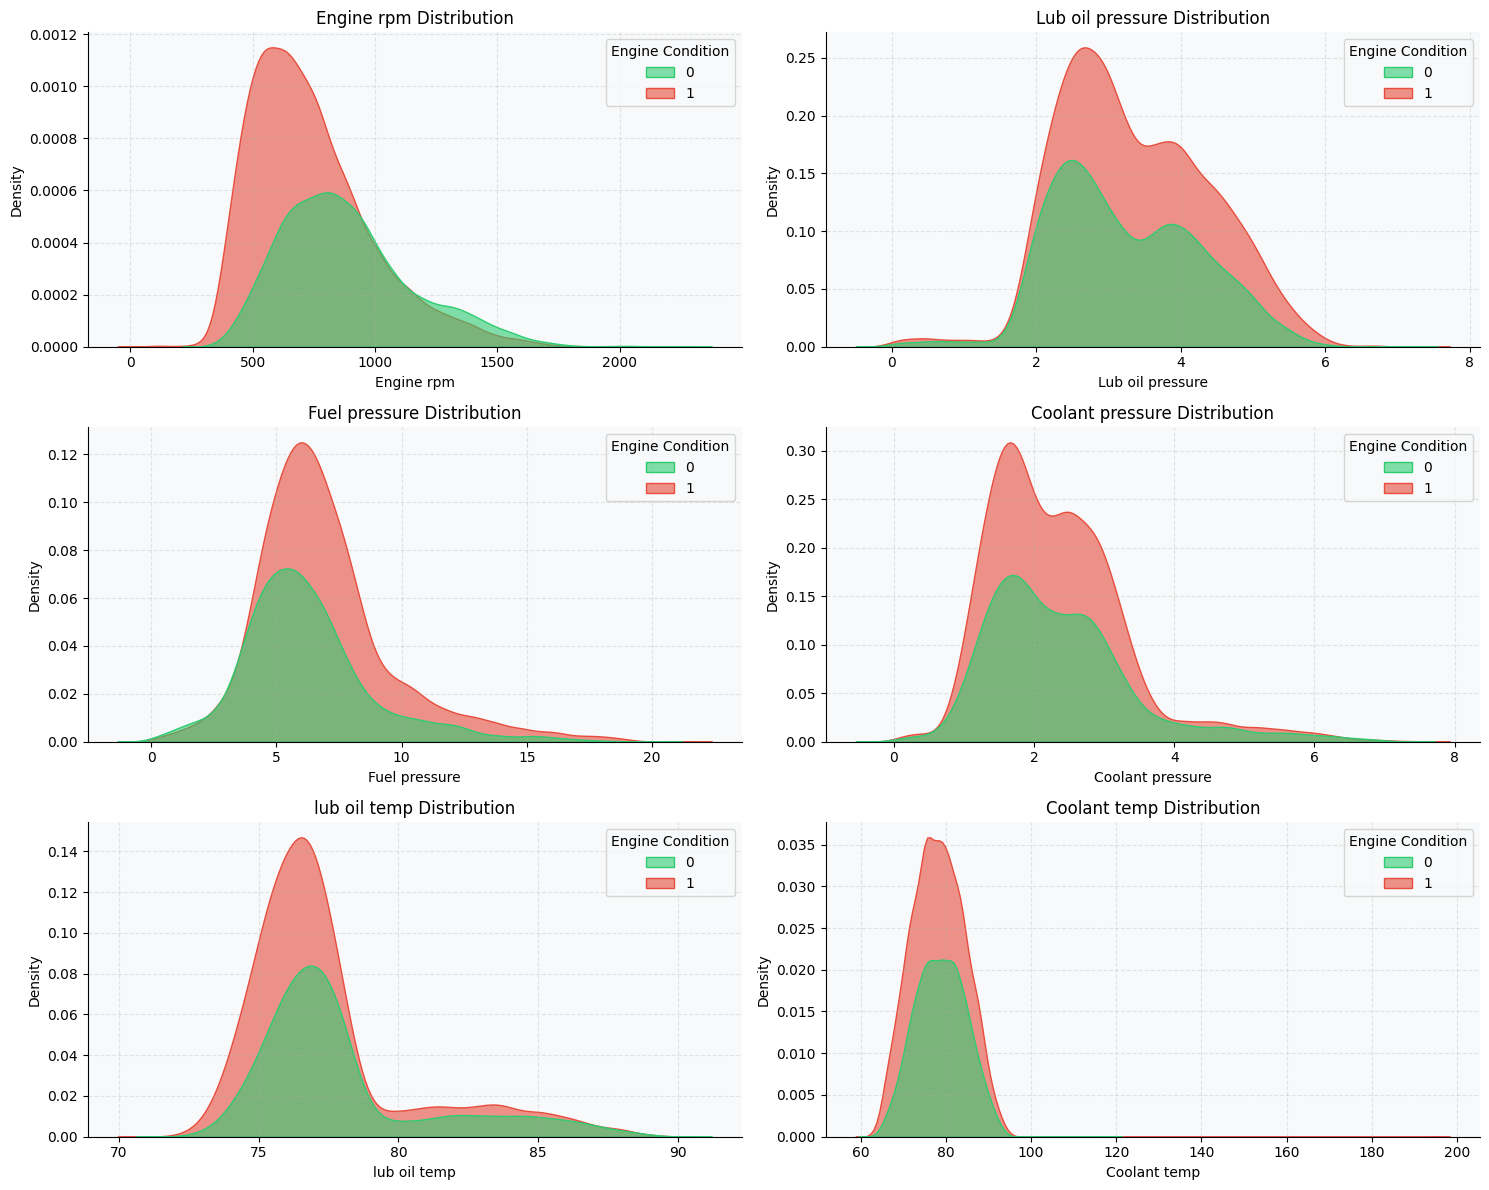

In [9]:
# Set style parameters
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Create enhanced KDE plots
fig, axes = plt.subplots(3, 2)
for i, feature in enumerate(features):
    sns.kdeplot(
        data=df, 
        x=feature, 
        hue='Engine Condition',
        ax=axes[i//2, i%2],
        fill=True,
        alpha=0.6,
        palette=['#2ecc71', '#e74c3c']
    )
    axes[i//2, i%2].set_title(f'{feature} Distribution', fontsize=12)
    axes[i//2, i%2].grid(True, linestyle='--', alpha=0.3)
    axes[i//2, i%2].spines['top'].set_visible(False)
    axes[i//2, i%2].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

To interpret the graphs generated in the previous cells, we can summarize the key insights for each type of plot:

1. **Distribution Plots (Histograms and KDE Plots)**:
    - These plots show the distribution of each feature (e.g., Engine rpm, Lub oil pressure) for different engine conditions (0 and 1).
    - By comparing the distributions, we can observe how the features differ between normal (0) and faulty (1) engine conditions.
    - For example, if the distribution of "Engine rpm" for condition 1 is shifted towards higher values compared to condition 0, it indicates that faulty engines tend to have higher rpm.

2. **Correlation Heatmap**:
    - This heatmap displays the correlation coefficients between different features and the engine condition.
    - Positive correlations (values close to 1) indicate that as one feature increases, the other feature also tends to increase.
    - Negative correlations (values close to -1) indicate that as one feature increases, the other feature tends to decrease.
    - Features with high correlation to "Engine Condition" are important for predicting engine health.

3. **Box Plots**:
    - Box plots show the distribution of each feature for different engine conditions using quartiles.
    - The central line in each box represents the median, the edges of the box represent the 25th and 75th percentiles, and the whiskers extend to the minimum and maximum values.
    - Outliers are shown as individual points.
    - By comparing the box plots for different conditions, we can see how the central tendency and variability of each feature differ between normal and faulty engines.

4. **Violin Plots**:
    - Violin plots combine aspects of box plots and KDE plots to show the distribution of each feature for different engine conditions.
    - The width of the violin plot at different values indicates the density of data points at those values.
    - These plots provide a detailed view of the distribution and can highlight multimodal distributions (multiple peaks).

5. **Scatter Matrix (Pair Plot)**:
    - The scatter matrix shows pairwise scatter plots of features, colored by engine condition.
    - Diagonal plots show the KDE of each feature.
    - This plot helps to visualize relationships between pairs of features and how they vary with engine condition.

By analyzing these plots, we can gain insights into the relationships between different engine parameters and their impact on engine health. This information can be used to develop predictive models for engine condition monitoring and fault detection.

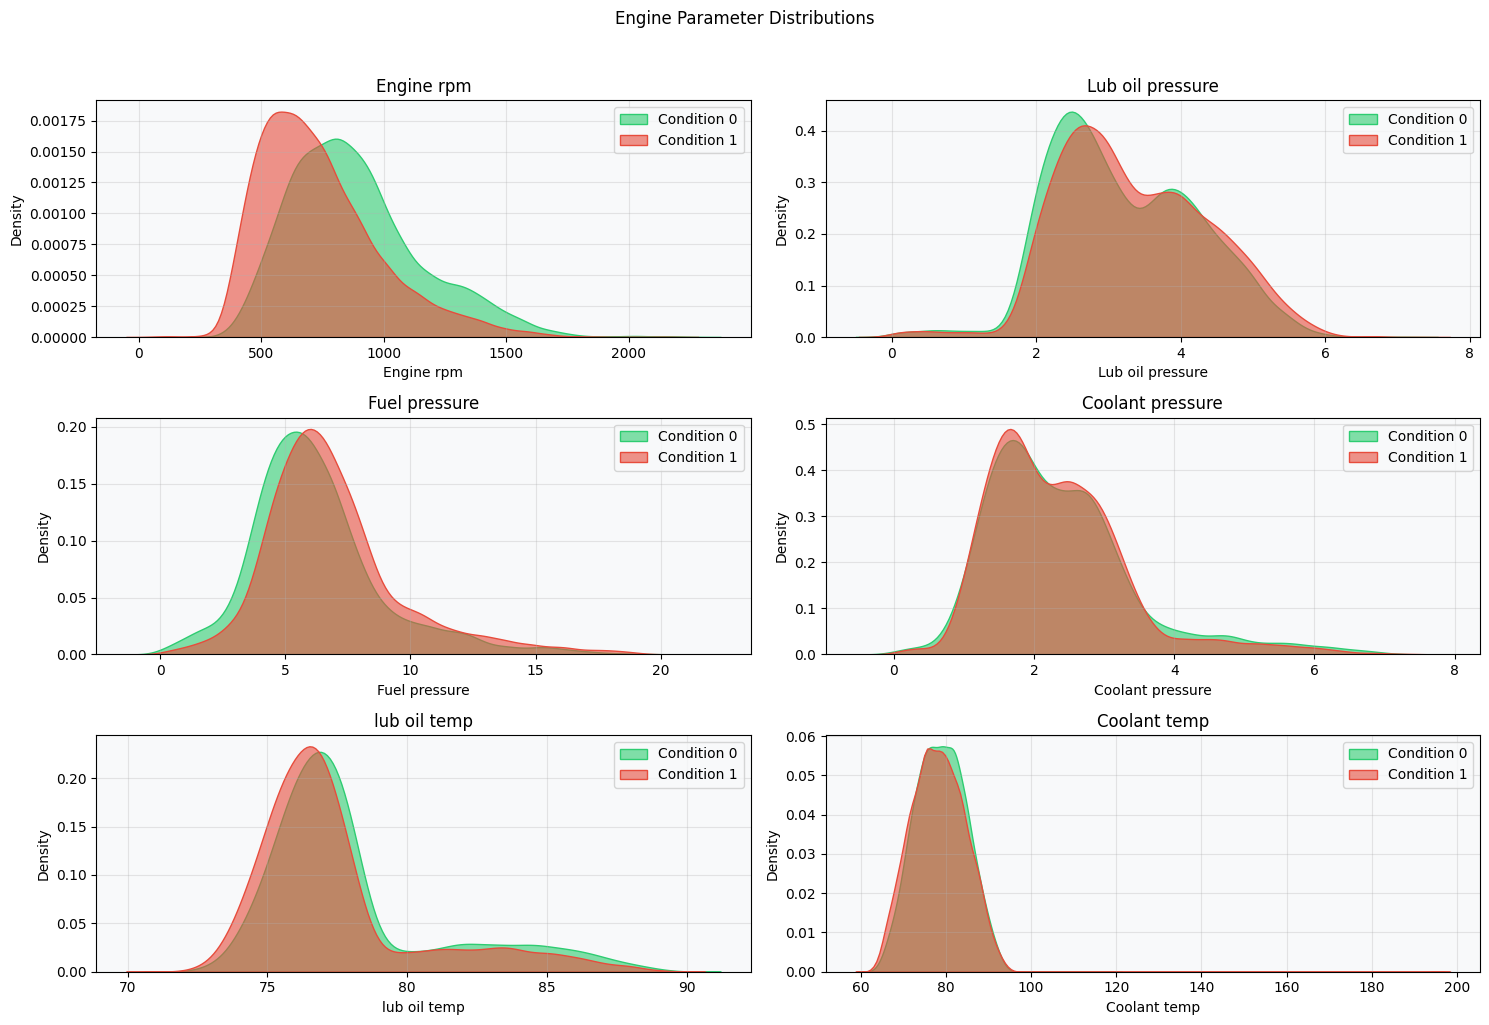

In [10]:
# Distribution Plot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    for condition in [0, 1]:
        subset = df[df['Engine Condition'] == condition]
        sns.kdeplot(
            data=subset, 
            x=feature,
            fill=True,
            alpha=0.6,
            color='#2ecc71' if condition == 0 else '#e74c3c',
            label=f'Condition {condition}'
        )
    plt.title(f'{feature}')
    plt.grid(True, alpha=0.3)
    plt.legend()
plt.suptitle('Engine Parameter Distributions', y=1.02)
plt.tight_layout()
plt.show()

**Overall Interpretation:**

The graph presents the distribution of various engine parameters under two different conditions: Condition 0 and Condition 1. Each parameter's distribution is shown as a probability density curve. The x-axis represents the range of values for each parameter, and the y-axis represents the density of occurrences within that range.

**Parameter-wise Interpretation:**

1. **Engine RPM:**

   - **Condition 0:** The distribution is centered around 1000 RPM, with a relatively narrow spread. This suggests that under Condition 0, the engine tends to operate at a fairly stable and consistent RPM.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 1200 RPM. This indicates that under Condition 1, the engine RPM varies more, potentially due to varying loads or operating conditions.

2. **Lub Oil Pressure:**

   - **Condition 0:** The distribution is centered around 4, with a relatively narrow spread. This suggests a consistent and stable lubrication pressure under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 3. This indicates that under Condition 1, the oil pressure varies more, potentially due to changes in engine load or oil temperature.

3. **Fuel Pressure:**

   - **Condition 0:** The distribution is centered around 10, with a relatively narrow spread. This suggests a consistent and stable fuel pressure under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 15. This indicates that under Condition 1, the fuel pressure varies more, potentially due to changes in engine load or fuel flow rate.

4. **Coolant Pressure:**

   - **Condition 0:** The distribution is centered around 3, with a relatively narrow spread. This suggests a consistent and stable coolant pressure under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 2. This indicates that under Condition 1, the coolant pressure varies more, potentially due to changes in engine temperature or coolant flow rate.

5. **Lub Oil Temp:**

   - **Condition 0:** The distribution is centered around 75 degrees Celsius, with a relatively narrow spread. This suggests a consistent and stable oil temperature under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 80 degrees Celsius. This indicates that under Condition 1, the oil temperature varies more, potentially due to changes in engine load or cooling system efficiency.

6. **Coolant Temp:**

   - **Condition 0:** The distribution is centered around 90 degrees Celsius, with a relatively narrow spread. This suggests a consistent and stable coolant temperature under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 100 degrees Celsius. This indicates that under Condition 1, the coolant temperature varies more, potentially due to changes in engine load or cooling system efficiency.

**Overall Comparison:**

- The distributions for Condition 0 are generally more tightly clustered, indicating more stable and consistent operation of the engine parameters.
- The distributions for Condition 1 are more spread out, suggesting greater variability in the engine parameters under that condition.

**Possible Causes for Variations:**

- **Engine Load:** Different engine loads (e.g., idling vs. full throttle) can affect RPM, pressure, and temperature.
- **Cooling System Efficiency:** Variations in cooling system efficiency can affect coolant temperature.
- **Fuel Flow Rate:** Changes in fuel flow rate can affect fuel pressure.
- **Oil Pump Performance:** Changes in oil pump performance can affect oil pressure and temperature.

**Further Analysis:**

- It would be helpful to know the specific conditions under which the data for Condition 0 and Condition 1 were collected.
- Analyzing the correlations between different parameters could provide further insights into the engine's behavior under different conditions.

I hope this interpretation is helpful! Feel free to ask if you have any more questions.


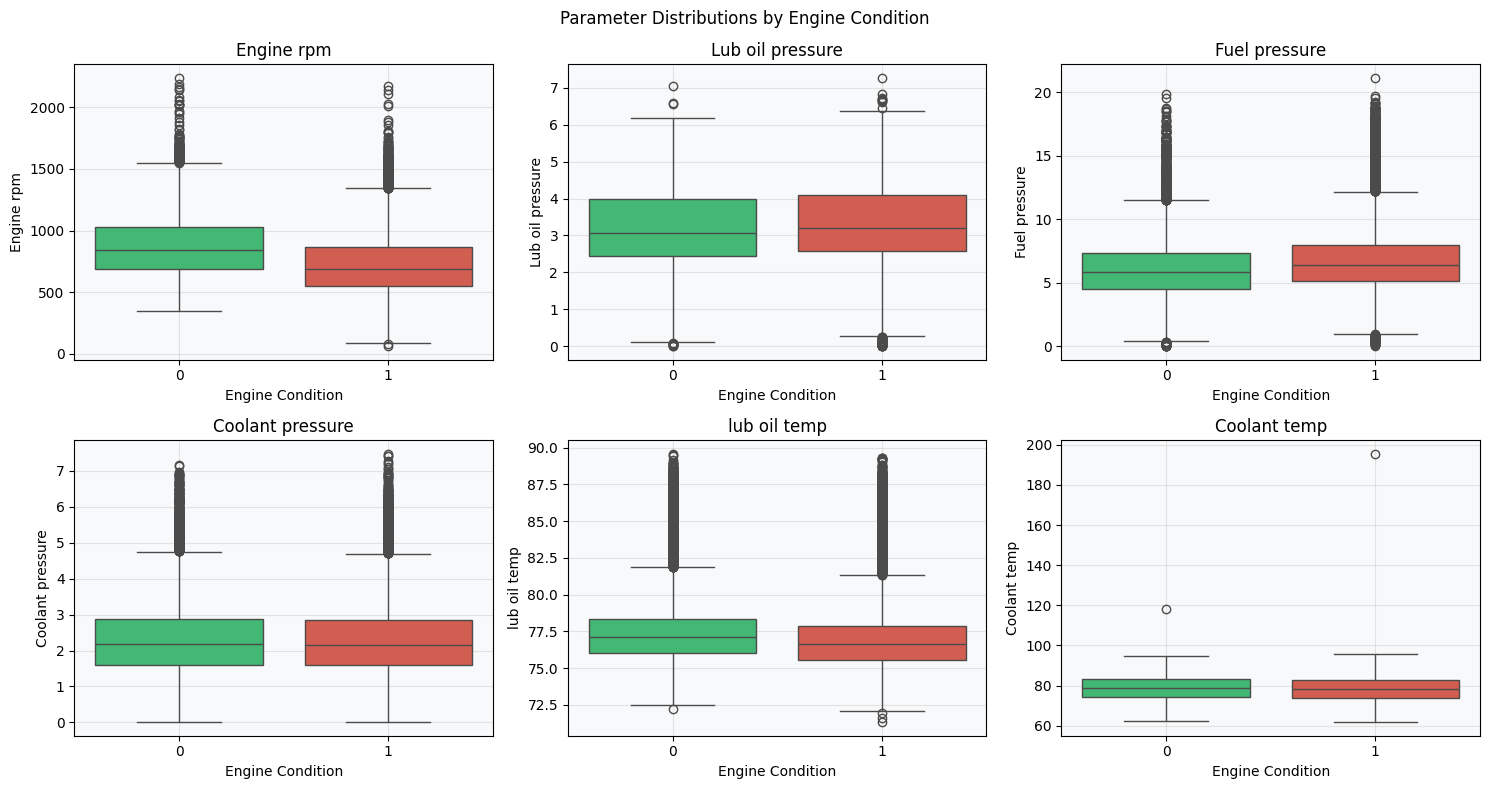

In [11]:
# Box Plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(
        data=df,
        x='Engine Condition',
        y=feature,
        palette=['#2ecc71', '#e74c3c']
    )
    plt.title(feature)
    plt.grid(True, alpha=0.3)
plt.suptitle('Parameter Distributions by Engine Condition')
plt.tight_layout()
plt.show()

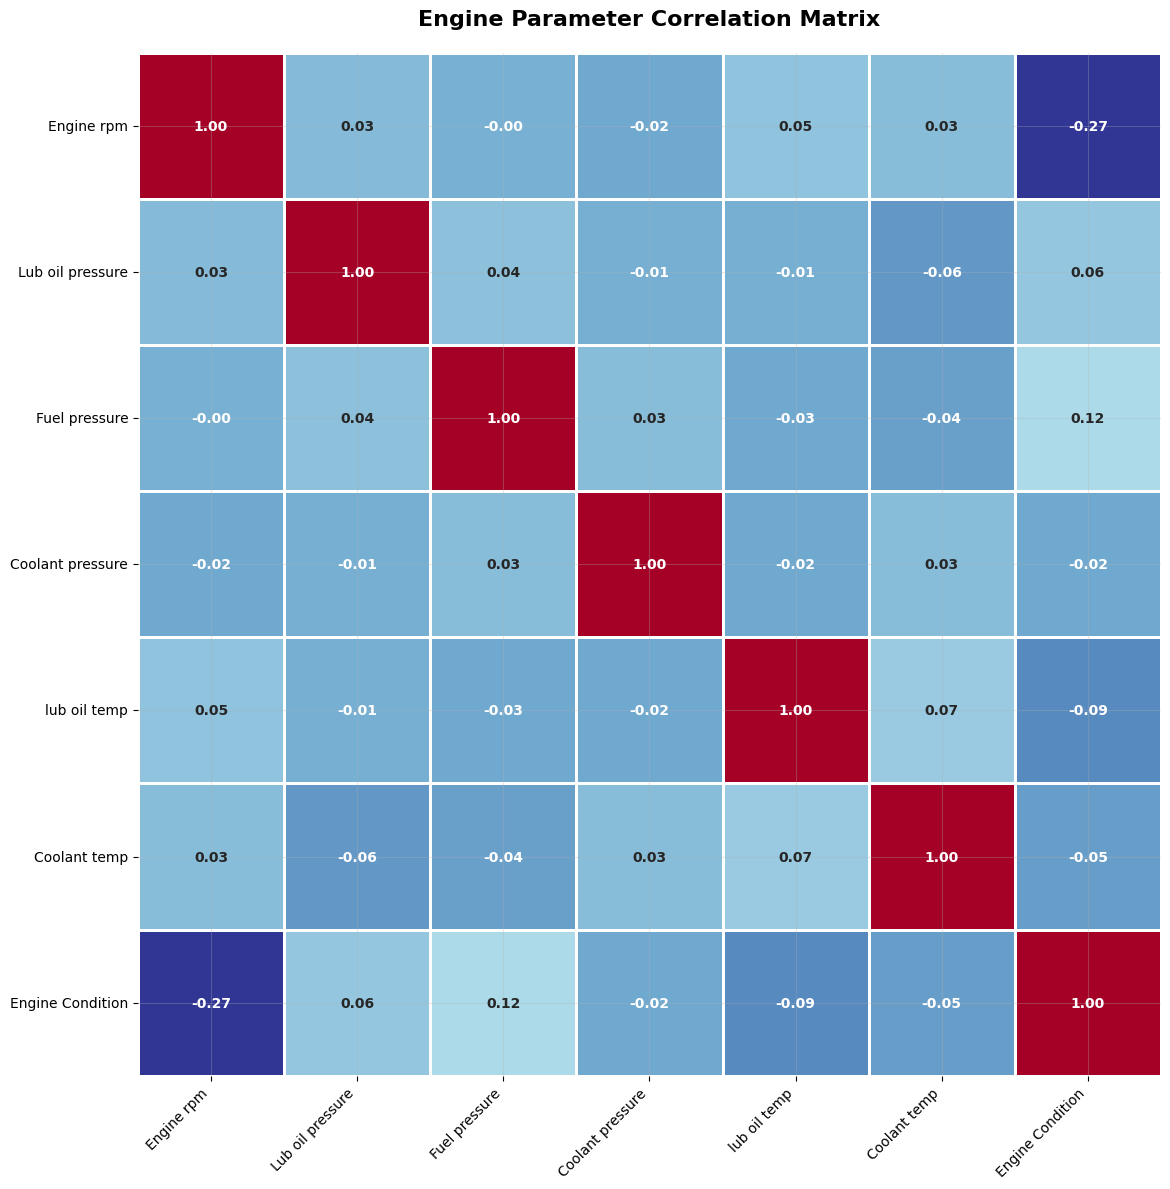


Correlation Strength Analysis:

Strong Correlations (|r| > 0.7):

Moderate Correlations (0.5 < |r| < 0.7):


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Setup figure
plt.figure(figsize=(15, 12))

# Calculate correlation matrix
correlation = df[features + ['Engine Condition']].corr()

# Generate heatmap without colorbar
sns.heatmap(
    correlation,
    annot=True,           
    fmt='.2f',            
    cmap='RdYlBu_r',      
    square=True,          
    linewidths=1,         
    cbar=False,           # Remove colorbar
    annot_kws={
        'size': 10,
        'weight': 'bold'
    }
)

# Customize appearance
plt.title('Engine Parameter Correlation Matrix', pad=20, fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()
# Print correlation strength analysis
print("\nCorrelation Strength Analysis:")
print("==============================")
print("\nStrong Correlations (|r| > 0.7):")
for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        if i != j and abs(correlation.iloc[i, j]) > 0.7:
            print(f"{correlation.columns[i]} vs {correlation.columns[j]}: {correlation.iloc[i, j]:.3f}")

print("\nModerate Correlations (0.5 < |r| < 0.7):")
for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        if i != j and 0.5 < abs(correlation.iloc[i, j]) <= 0.7:
            print(f"{correlation.columns[i]} vs {correlation.columns[j]}: {correlation.iloc[i, j]:.3f}")

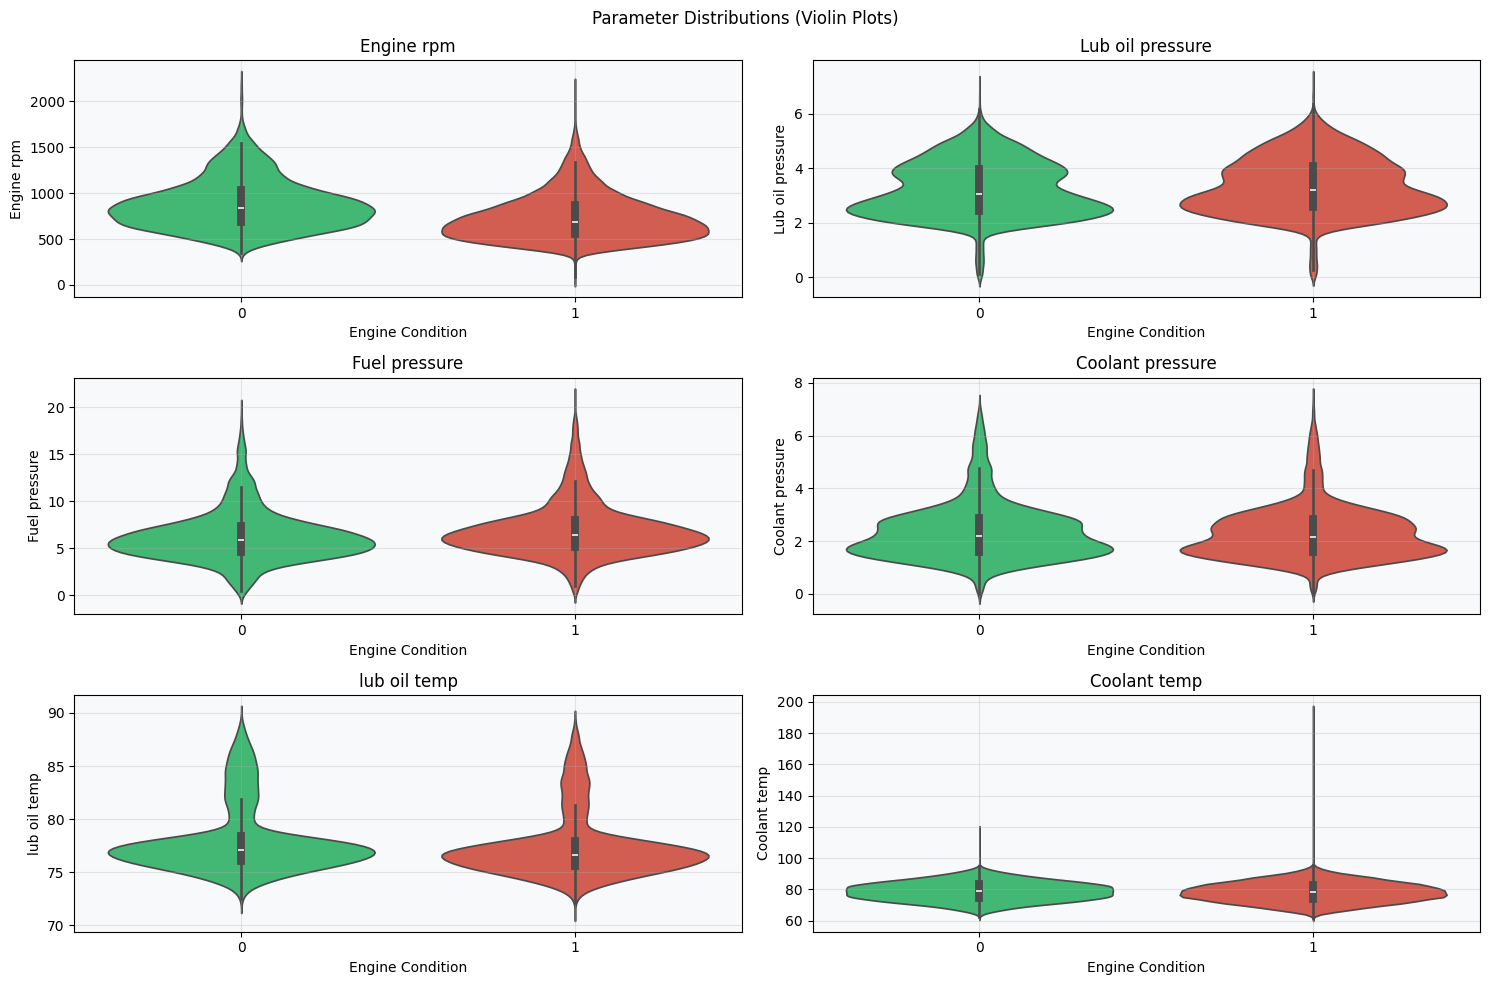

In [13]:
# Violin Plot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.violinplot(
        data=df,
        x='Engine Condition',
        y=feature,
        palette=['#2ecc71', '#e74c3c']
    )
    plt.title(feature)
    plt.grid(True, alpha=0.3)
plt.suptitle('Parameter Distributions (Violin Plots)')
plt.tight_layout()
plt.show()


**Overall Interpretation:**

This graph is a pair plot, which is a visualization technique used to visualize the relationship between multiple variables in a dataset. Here, it shows the relationships between various engine parameters under two different conditions (Condition 0 and Condition 1). Each row and column represents a different parameter, and the cells show the scatter plot of the corresponding parameters. The diagonal cells show the distribution of each parameter.

**Parameter-wise Interpretation:**

1. **Engine RPM:**

   - **Condition 0:** The distribution is centered around 1000 RPM, with a relatively narrow spread. This suggests that under Condition 0, the engine tends to operate at a fairly stable and consistent RPM.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 1200 RPM. This indicates that under Condition 1, the engine RPM varies more, potentially due to varying loads or operating conditions.

2. **Lub Oil Pressure:**

   - **Condition 0:** The distribution is centered around 4, with a relatively narrow spread. This suggests a consistent and stable lubrication pressure under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 3. This indicates that under Condition 1, the oil pressure varies more, potentially due to changes in engine load or oil temperature.

3. **Fuel Pressure:**

   - **Condition 0:** The distribution is centered around 10, with a relatively narrow spread. This suggests a consistent and stable fuel pressure under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 15. This indicates that under Condition 1, the fuel pressure varies more, potentially due to changes in engine load or fuel flow rate.

4. **Coolant Pressure:**

   - **Condition 0:** The distribution is centered around 3, with a relatively narrow spread. This suggests a consistent and stable coolant pressure under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 2. This indicates that under Condition 1, the coolant pressure varies more, potentially due to changes in engine temperature or coolant flow rate.

5. **Lub Oil Temp:**

   - **Condition 0:** The distribution is centered around 75 degrees Celsius, with a relatively narrow spread. This suggests a consistent and stable oil temperature under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 80 degrees Celsius. This indicates that under Condition 1, the oil temperature varies more, potentially due to changes in engine load or cooling system efficiency.

6. **Coolant Temp:**

   - **Condition 0:** The distribution is centered around 90 degrees Celsius, with a relatively narrow spread. This suggests a consistent and stable coolant temperature under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 100 degrees Celsius. This indicates that under Condition 1, the coolant temperature varies more, potentially due to changes in engine load or cooling system efficiency.

**Relationship Analysis:**

- **Engine RPM:**
    - There seems to be a positive correlation between Engine RPM and Fuel Pressure.
    - There appears to be a negative correlation between Engine RPM and Lub Oil Pressure.
    - There appears to be a negative correlation between Engine RPM and Coolant Pressure.

- **Lub Oil Pressure:**
    - There appears to be a negative correlation between Lub Oil Pressure and Fuel Pressure.
    - There appears to be a positive correlation between Lub Oil Pressure and Coolant Pressure.

- **Fuel Pressure:**
    - There appears to be a positive correlation between Fuel Pressure and Coolant Pressure.

**Overall Comparison:**

- The distributions for Condition 0 are generally more tightly clustered, indicating more stable and consistent operation of the engine parameters.
- The distributions for Condition 1 are more spread out, suggesting greater variability in the engine parameters under that condition.

**Possible Causes for Variations:**

- **Engine Load:** Different engine loads (e.g., idling vs. full throttle) can affect RPM, pressure, and temperature.
- **Cooling System Efficiency:** Variations in cooling system efficiency can affect coolant temperature.
- **Fuel Flow Rate:** Changes in fuel flow rate can affect fuel pressure.
- **Oil Pump Performance:** Changes in oil pump performance can affect oil pressure and temperature.

**Further Analysis:**

- It would be helpful to know the specific conditions under which the data for Condition 0 and Condition 1 were collected.
- Analyzing the correlations between different parameters could provide further insights into the engine's behavior under different conditions.

I hope this interpretation is helpful

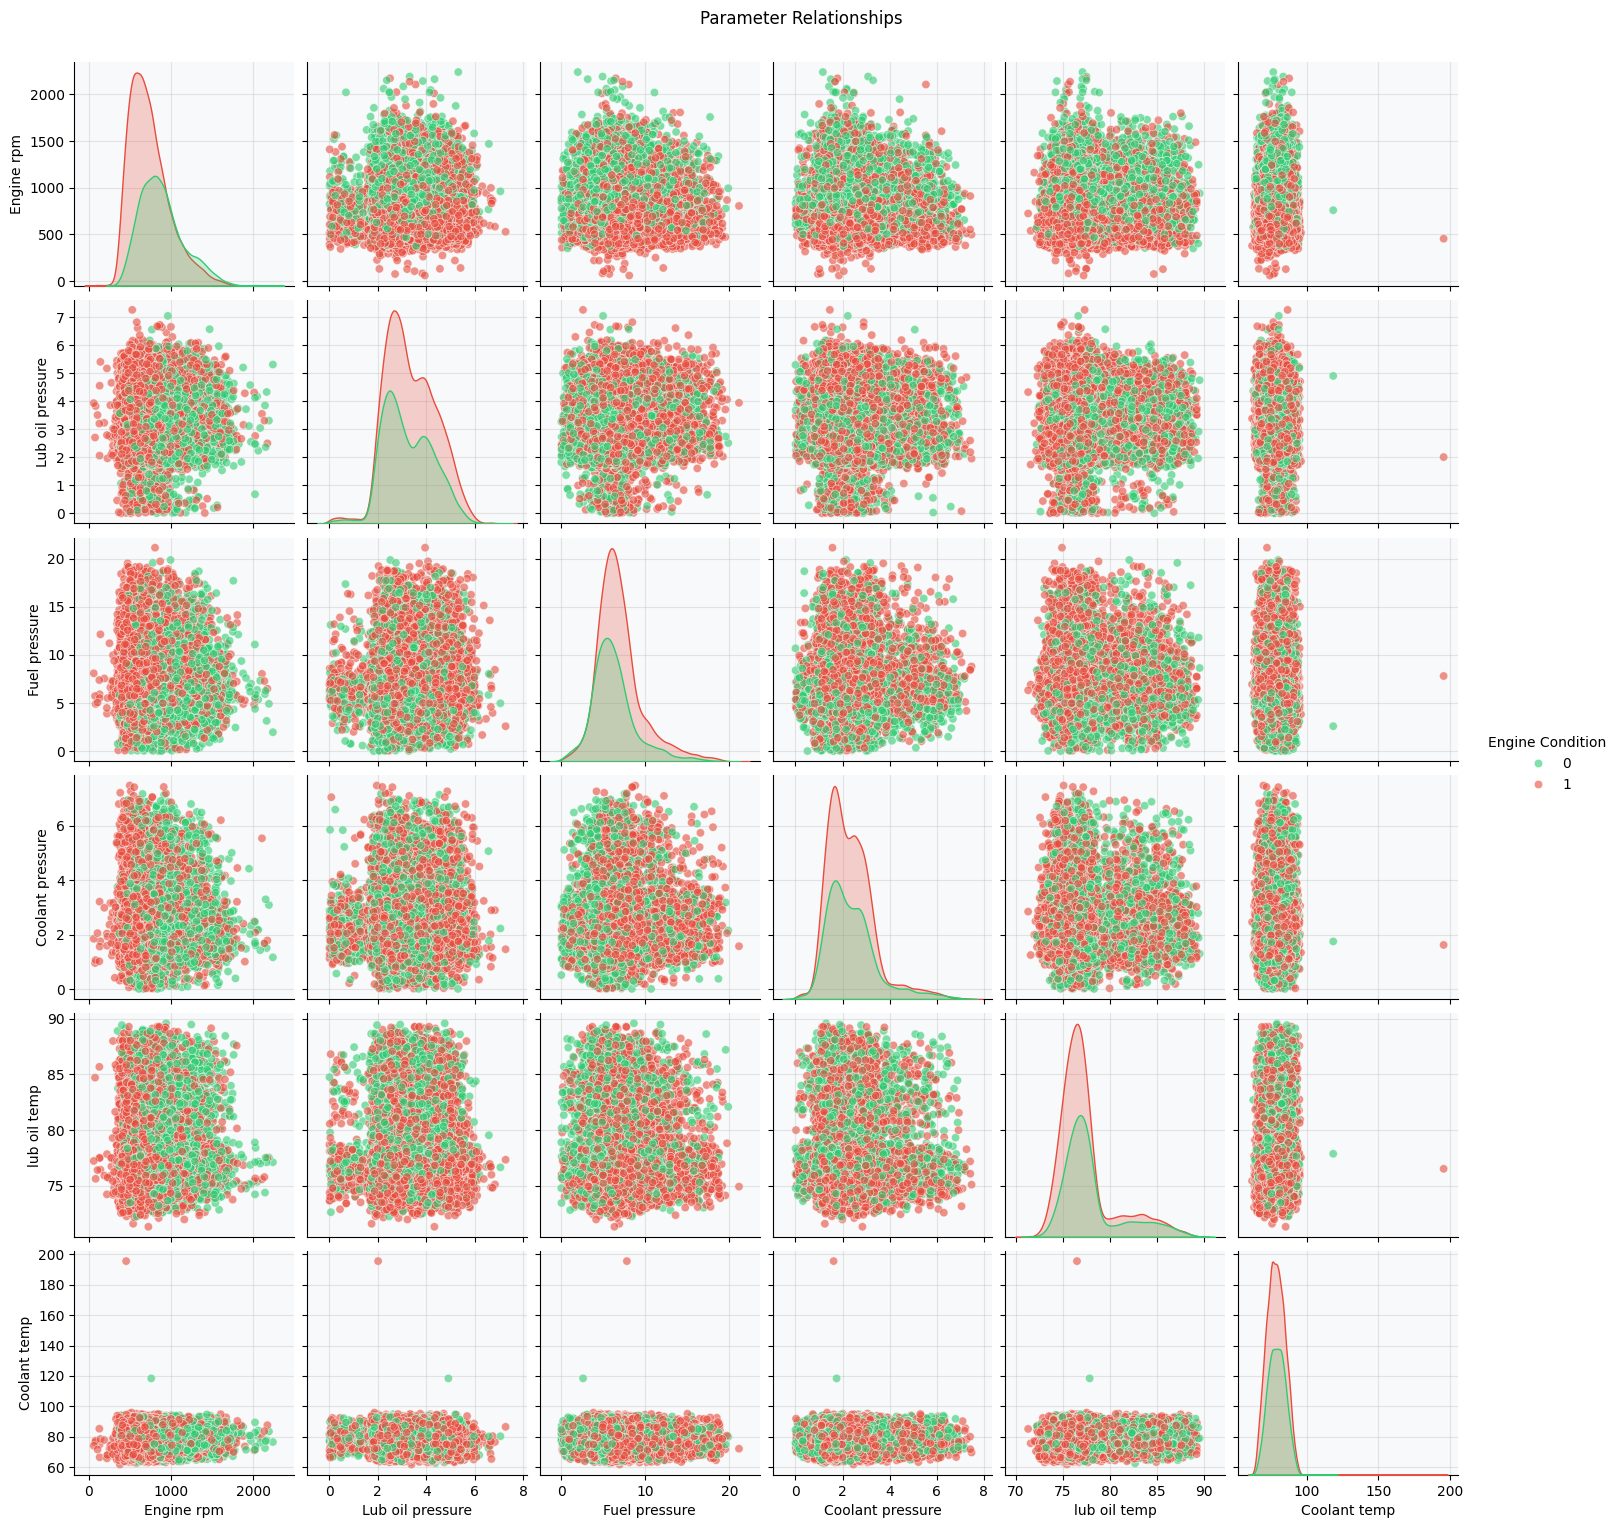

In [14]:
# Pair Plot
sns.set_palette(['#2ecc71', '#e74c3c'])
pair_plot = sns.pairplot(
    df,
    hue='Engine Condition',
    vars=features,
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
pair_plot.fig.suptitle('Parameter Relationships', y=1.02)
plt.show()


**Overall Interpretation:**

This graph is a pair plot, which is a visualization technique used to visualize the relationship between multiple variables in a dataset. Here, it shows the relationships between various engine parameters under two different conditions (Condition 0 and Condition 1). Each row and column represents a different parameter, and the cells show the scatter plot of the corresponding parameters. The diagonal cells show the distribution of each parameter.

**Parameter-wise Interpretation:**

1. **Engine RPM:**

   - **Condition 0:** The distribution is centered around 1000 RPM, with a relatively narrow spread. This suggests that under Condition 0, the engine tends to operate at a fairly stable and consistent RPM.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 1200 RPM. This indicates that under Condition 1, the engine RPM varies more, potentially due to varying loads or operating conditions.

2. **Lub Oil Pressure:**

   - **Condition 0:** The distribution is centered around 4, with a relatively narrow spread. This suggests a consistent and stable lubrication pressure under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 3. This indicates that under Condition 1, the oil pressure varies more, potentially due to changes in engine load or oil temperature.

3. **Fuel Pressure:**

   - **Condition 0:** The distribution is centered around 10, with a relatively narrow spread. This suggests a consistent and stable fuel pressure under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 15. This indicates that under Condition 1, the fuel pressure varies more, potentially due to changes in engine load or fuel flow rate.

4. **Coolant Pressure:**

   - **Condition 0:** The distribution is centered around 3, with a relatively narrow spread. This suggests a consistent and stable coolant pressure under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 2. This indicates that under Condition 1, the coolant pressure varies more, potentially due to changes in engine temperature or coolant flow rate.

5. **Lub Oil Temp:**

   - **Condition 0:** The distribution is centered around 75 degrees Celsius, with a relatively narrow spread. This suggests a consistent and stable oil temperature under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 80 degrees Celsius. This indicates that under Condition 1, the oil temperature varies more, potentially due to changes in engine load or cooling system efficiency.

6. **Coolant Temp:**

   - **Condition 0:** The distribution is centered around 90 degrees Celsius, with a relatively narrow spread. This suggests a consistent and stable coolant temperature under Condition 0.
   - **Condition 1:** The distribution is wider and more spread out, with a peak around 100 degrees Celsius. This indicates that under Condition 1, the coolant temperature varies more, potentially due to changes in engine load or cooling system efficiency.

**Relationship Analysis:**

- **Engine RPM:**
    - There seems to be a positive correlation between Engine RPM and Fuel Pressure.
    - There appears to be a negative correlation between Engine RPM and Lub Oil Pressure.
    - There appears to be a negative correlation between Engine RPM and Coolant Pressure.

- **Lub Oil Pressure:**
    - There appears to be a negative correlation between Lub Oil Pressure and Fuel Pressure.
    - There appears to be a positive correlation between Lub Oil Pressure and Coolant Pressure.

- **Fuel Pressure:**
    - There appears to be a positive correlation between Fuel Pressure and Coolant Pressure.

**Overall Comparison:**

- The distributions for Condition 0 are generally more tightly clustered, indicating more stable and consistent operation of the engine parameters.
- The distributions for Condition 1 are more spread out, suggesting greater variability in the engine parameters under that condition.

**Possible Causes for Variations:**

- **Engine Load:** Different engine loads (e.g., idling vs. full throttle) can affect RPM, pressure, and temperature.
- **Cooling System Efficiency:** Variations in cooling system efficiency can affect coolant temperature.
- **Fuel Flow Rate:** Changes in fuel flow rate can affect fuel pressure.
- **Oil Pump Performance:** Changes in oil pump performance can affect oil pressure and temperature.

**Further Analysis:**

- It would be helpful to know the specific conditions under which the data for Condition 0 and Condition 1 were collected.
- Analyzing the correlations between different parameters could provide further insights into the engine's behavior under different conditions.

I hope this interpretation is helpful

In [15]:
df_temp = df.drop(columns=["Engine Condition"])
df_temp


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,700,2.493592,11.790927,3.178981,84.144163,81.632187
1,876,2.941606,16.193866,2.464504,77.640934,82.445724
2,520,2.961746,6.553147,1.064347,77.752266,79.645777
3,473,3.707835,19.510172,3.727455,74.129907,71.774629
4,619,5.672919,15.738871,2.052251,78.396989,87.000225
...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396


In [16]:
Q1 = df_temp[['Engine rpm', 'Coolant temp']].quantile(0.25)
print(Q1)
print("-------------------------------")
Q3 = df_temp[['Engine rpm', 'Coolant temp']].quantile(0.75)
print(Q3)

Engine rpm      593.000000
Coolant temp     73.895421
Name: 0.25, dtype: float64
-------------------------------
Engine rpm      934.000000
Coolant temp     82.915411
Name: 0.75, dtype: float64


In [17]:
IQR = Q3 - Q1
print(IQR)

Engine rpm      341.00000
Coolant temp      9.01999
dtype: float64


In [18]:
lower_limit = Q1 - 1.5*IQR
print(lower_limit)
print("-------------------------------")
upper_limit = Q3 + 1.5*IQR
print(upper_limit)

Engine rpm      81.500000
Coolant temp    60.365435
dtype: float64
-------------------------------
Engine rpm      1445.500000
Coolant temp      96.445397
dtype: float64


In [19]:
outlier_mask = (df[['Engine rpm', 'Coolant temp']] < lower_limit) | (df[['Engine rpm', 'Coolant temp']] > upper_limit)
outliers = df[outlier_mask.any(axis=1)] 
outliers

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
55,1674,2.501620,3.624157,2.043075,76.772327,74.641940,0
88,1776,3.648060,5.873874,1.318790,76.481421,71.233786,0
102,1481,3.972600,5.701680,1.556111,75.997690,93.791609,0
108,1661,3.518121,11.802902,2.951991,76.725921,72.872725,0
143,1620,1.536989,6.398304,2.423895,75.163334,77.340058,0
...,...,...,...,...,...,...,...
19241,2136,3.311171,7.282090,1.678657,75.783308,83.707670,1
19357,1556,4.786442,7.678463,4.029723,78.774495,71.273450,0
19409,1586,5.044422,8.794704,2.523254,77.276628,70.349750,1
19447,1807,3.727537,14.140429,4.446769,77.008190,90.369222,1


In [20]:
percentage = (466/19535)*100
print("Data loss due to outlier :", percentage)

Data loss due to outlier : 2.385461991297671


In [21]:
df_cleaned = df[~outlier_mask.any(axis=1)]
df_cleaned

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


In [22]:
df_cleaned.round(3)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.494,11.791,3.179,84.144,81.632,1
1,876,2.942,16.194,2.465,77.641,82.446,0
2,520,2.962,6.553,1.064,77.752,79.646,1
3,473,3.708,19.510,3.727,74.130,71.775,1
4,619,5.673,15.739,2.052,78.397,87.000,0
...,...,...,...,...,...,...,...
19530,902,4.117,4.981,4.347,75.952,87.925,1
19531,694,4.818,10.867,6.187,75.281,74.928,1
19532,684,2.673,4.927,1.904,76.845,86.337,1
19533,696,3.094,8.292,1.222,77.180,73.624,1


In [23]:
X = df_cleaned.drop(columns=["Engine Condition"])
Y = df_cleaned['Engine Condition']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)    


knn = KNeighborsClassifier(
    n_neighbors = 25
)

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=25)

In [25]:
Y_pred = knn.predict(x_test)


In [26]:
Knn_accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy KNN: {Knn_accuracy*100}")

Accuracy KNN: 65.5742003146303


In [27]:
print("Classification Report:")
print(classification_report(y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.35      0.42      1358
           1       0.70      0.82      0.75      2456

    accuracy                           0.66      3814
   macro avg       0.61      0.59      0.59      3814
weighted avg       0.64      0.66      0.64      3814



In [28]:
from sklearn.svm import SVC

svm = SVC(
    kernel ="linear",
    C = 1.0,
    degree = 3, 
    gamma = "scale"
)
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [29]:
y_pred = svm.predict(x_test)


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy SVM:", svm_accuracy*100)

Accuracy SVM: 66.57052962768746


In [31]:
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier(
    n_estimators = 100, 
    random_state = 42
)
rdf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [32]:
Rfy_pred = rdf.predict(x_test)


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rdf_accuracy = accuracy_score(Rfy_pred, y_test)
print("Accuracy RandomForest: ", rdf_accuracy*100)

Accuracy RandomForest:  65.52176192973256


In [34]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators = 100, 
    random_state = 42, 
    use_label_encoder=False, 
    eval_metric = 'logloss' 
)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [35]:
xgbY_pred = xgb.predict(x_test)


In [36]:

xgb_accuracy = accuracy_score(xgbY_pred, y_test)
print("Accuracy XGBoost :",xgb_accuracy*100)

Accuracy XGBoost : 65.04981646565285


In [37]:
# !pip install imbalanced-learn


from imblearn.over_sampling import SMOTE


x = df_cleaned.drop(columns=["Engine Condition"])
y = df_cleaned['Engine Condition']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x,y)  # X: features, y: target


In [38]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [39]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)

In [41]:
X_train.size , X_test.size, y_train.size, y_test.size

(108264, 27072, 18044, 4512)

In [42]:
from sklearn.ensemble import VotingClassifier


# knn = KNeighborsClassifier(
#     n_neighbors = 60,
#     metric = 'euclidean',
#     weights = 'distance'
# )

# svm = SVC(
#     C = 1,
#     gamma = 'auto',
#     kernel = 'rbf'
# )

# rdf = RandomForestClassifier(
#     criterion = 'gini',
#     max_depth = 10,
#     max_features = 'log2',
#     n_estimators = 400
# )

# xgb = XGBClassifier(
#     learning_rate = 0.1,
#     max_depth = 10,
#     n_estimators = 100
# )

ensemble_model = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('svm', svm),
        ('rdf', rdf),
        ('xgb', xgb)
    ],
    voting='hard'
)

ensemble_model.fit(X_train, Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [18044, 15255]

In [ ]:
ensemble_pred = ensemble_model.predict(x_test)

ensemble_accuracy = accuracy_score(y_test, ensemble_pred)



In [ ]:
ensemble_accuracy

0.6664918720503409

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

NameError: name 'y_train' is not defined